# Import packages

In [1]:
# for data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# for evaluation
from time import process_time
from sklearn.metrics import confusion_matrix, classification_report

# for Visualization
import seaborn as sns
from matplotlib import pyplot as plt

# To handle warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users/Heart Failure Dataset.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Preparation

**1- Check duplicates and missing values**

In [3]:
print('Number of duplicates: {}'.format(sum(df.duplicated())))
print('Number of NaN/Null values: {}'.format(df.isnull().values.sum()))

Number of duplicates: 0
Number of NaN/Null values: 0


**2- Check data balance**

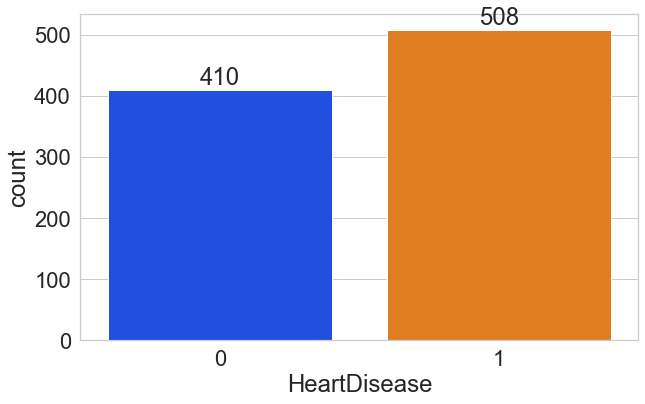

In [36]:
import seaborn as sns

ax = sns.countplot(x="HeartDisease", data=df, palette= "bright")

Classes = ['No Heart Failure, Heart Failure']
# customize figsize,font, and color
sns.set(rc={'figure.figsize':(10,6)},style="whitegrid", font_scale=2)  

for i in ax.containers:
    ax.bar_label(i,)

**3- Find out the categorical columns in data**

In [6]:
df.select_dtypes(include=['object']).columns.tolist()

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

**4- Find out the numeric columns in data**

In [7]:
df.select_dtypes(exclude=['object']).columns.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

**5- Create Features (X), and Labels (y)** 

In [8]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

**6- Encoding the categorical columns values**

In [9]:
# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
X = X.apply(le.fit_transform)

**7- How features look like after encoding?**

In [10]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


**8- Features Scaling**

In [11]:
scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X) 

**9- Data Resampling**

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_over)}')

Original dataset shape : Counter({1: 508, 0: 410})
Resampled dataset shape Counter({0: 508, 1: 508})


**10- Splitting Dataset to train set and test set**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=0)

# Comparative Analysis of Classifiers

In [15]:
#creating the objects
lr =LogisticRegression()
svc =SVC()
knn =KNeighborsClassifier()
xgb = XGBClassifier()
dt =DecisionTreeClassifier()
rf =RandomForestClassifier()
ex = ExtraTreesClassifier()

models_dict = {0: 'Logistic Regression',
               1: 'Support Vector machine',
               2: 'K-Nearest Neighbors', 
               3: 'XGBoost',
               4:'Decision Tree',
               5:'Random Forest',
               6:'Extra Trees',
              }

models=[lr,svc,knn,xgb,dt,rf,ex]

frames = []

for i,model in enumerate(models):
    start = process_time()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    end = process_time()
    t= end - start
    acc = round(acc, 2)
    t = round(t, 3)
    A = pd.DataFrame([[models_dict[i],acc,t]])
    frames.append(A)
    
Model_Table = pd.concat(frames,ignore_index = True) 
# put names for columns
Model_Table.columns =['Model','Test Accuracy','Training Time in seconds'] 

Model_Table

,Model,Test Accuracy,Training Time in seconds
0,Logistic Regression,0.87,0.094
1,Support Vector machine,0.89,0.078
2,K-Nearest Neighbors,0.86,0.047
3,XGBoost,0.87,0.656
4,Decision Tree,0.78,0.109
5,Random Forest,0.91,0.891
6,Extra Trees,0.89,0.469


**Insights:**

    -Support vector machine,Random forest and Extraa trees classifiers are the best classifiers in the test accuracy.
    
    -Random Forest seems to be the best, but since their results are close, it is necessary to do more deep evaluation to find out the best of them.

# Evaluation the best three models

**1- Support Vector Machine**

In [37]:
y_pred_svc = svc.predict(X_test)

labels=['Heart Failure', 'No Heart Failure']

print("Classification Report of SVC:\n",classification_report(y_test, y_pred_svc,target_names=labels, digits=2))

Classification Report of SVC:
                   precision    recall  f1-score   support

   Heart Failure       0.92      0.86      0.89       126
No Heart Failure       0.87      0.93      0.90       128

        accuracy                           0.89       254
       macro avg       0.90      0.89      0.89       254
    weighted avg       0.90      0.89      0.89       254



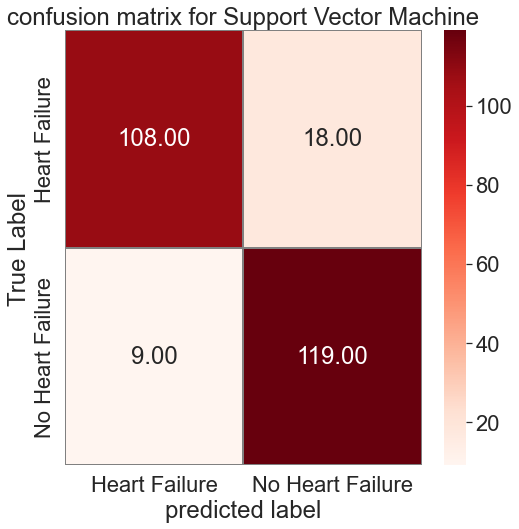

In [40]:
confusion_mtx = confusion_matrix(y_test,y_pred_svc)
f,ax = plt.subplots(figsize = (8,8))

sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax,
            xticklabels=labels, yticklabels=labels
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix for Support Vector Machine")
plt.show()

**2- Random Forest Classifier:**

In [38]:
y_pred_rf = rf.predict(X_test)
print("Classification Report for Random Forest:\n",classification_report(y_test, y_pred_rf,target_names=labels, digits=2))

Classification Report for Random Forest:
                   precision    recall  f1-score   support

   Heart Failure       0.93      0.87      0.90       126
No Heart Failure       0.88      0.94      0.91       128

        accuracy                           0.91       254
       macro avg       0.91      0.91      0.91       254
    weighted avg       0.91      0.91      0.91       254



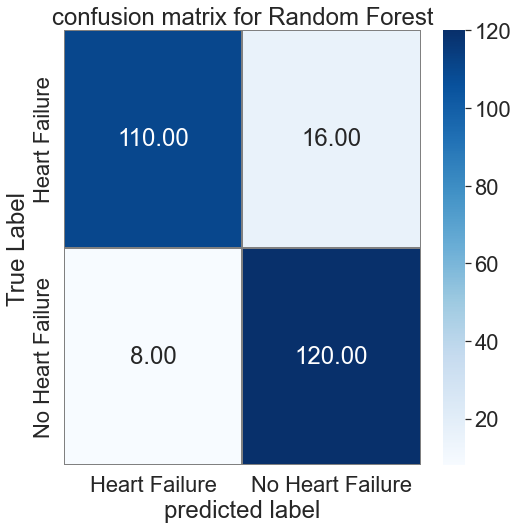

In [41]:
confusion_mtx = confusion_matrix(y_test,y_pred_rf)
f,ax = plt.subplots(figsize = (8,8))
labels=['Heart Failure', 'No Heart Failure']

sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Blues",
            linecolor = "gray",fmt = ".2f",ax=ax,
            xticklabels=labels, yticklabels=labels
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix for Random Forest")
plt.show()

**3- Extra Trees Classifier:**

In [39]:
y_pred_ex = ex.predict(X_test)
print("Classification Report for Extra Tree:\n",classification_report(y_test, y_pred_ex,target_names=labels, digits=2))

Classification Report for Extra Tree:
                   precision    recall  f1-score   support

   Heart Failure       0.90      0.88      0.89       126
No Heart Failure       0.89      0.91      0.90       128

        accuracy                           0.89       254
       macro avg       0.89      0.89      0.89       254
    weighted avg       0.89      0.89      0.89       254



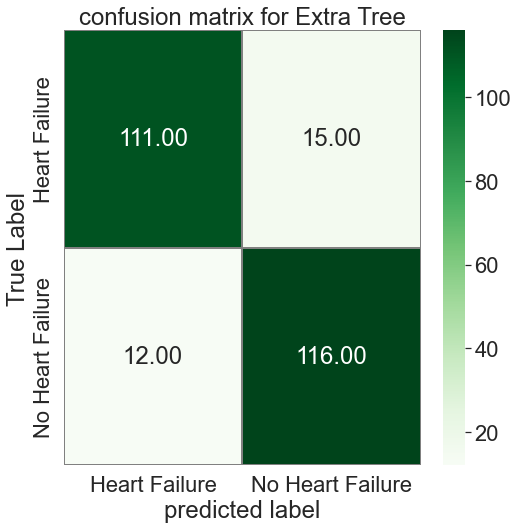

In [42]:
confusion_mtx = confusion_matrix(y_test,y_pred_ex)
f,ax = plt.subplots(figsize = (8,8))
labels=['Heart Failure', 'No Heart Failure']

sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax,
            xticklabels=labels, yticklabels=labels
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix for Extra Tree")
plt.show()

**Insight:**
    
    - False negative for support vector machine is 18.
    
    - False negative for random forest is 16.
    
    - False negative for extra trees is 15.
    
    Consequently, Extra Trees Algorithm is the best because in Heart failure classification use case what matters more is to false negative to be as reduced as possible.
    

**Define a function to encode the string (categorical) values in new test example:**

In [23]:
def encoder(x):
    #match each string with num
    return {
        'M': 1,
        'F': 0,
        'ATA': 1, 
        'NAP': 2,
        'ASY': 0,
        'TA': 3,
        'Normal': 1,
        'ST': 2,
        'LVH': 0,
        'N': 0,
        'Y': 1,
        'Up': 2,
        'Flat': 1,
        'Down': 0,
        
         }.get(x, 0.0) 

**Build a function to predict result (classify) for new instances:**

In [24]:
def Predict(new):
    
    #scaling the input list
    scaled_input = scaler.transform(new)
    
    #calling the prediction model
    pred = ex.predict(scaled_input)
    
    #take the result as an integer number from the resulted array
    result = int(pred)
    
    #find the probability 
    prob = np.max(ex.predict_proba(scaled_input), axis=1) 
    
    # convert to float with two decimal places
    proba = "{:.2f}".format(float(prob)) 
    
    #express result as sentence
    if result == 0:
        end_result = 'No Heart Failure'
    else: end_result = 'Heart Failure'
    
    #print result
    print('Predicted result is: ', end_result, 'with', proba , 'as a probability')

# An Example on Predicting [Heart Failure]

In [25]:
value1 = input("Please enter Age :\n")
value2 = input("Please enter Sex :\n")
value3 = input("Please enter ChestPainType:\n")
value4 = input("Please enter RestingBP:\n")
value5 = input("Please enter Cholesterol:\n")
value6 = input("Please enter FastingBS:\n")
value7 = input("Please enter RestingECG:\n")
value8 = input("Please enter MaxHR:\n")
value9 = input("Please enter ExerciseAngina :\n")
value10 = input("Please enter Oldpeak :\n")
value11 = input("Please enter ST_Slope:\n")

# take the input values form user and put it in a list of list
Lista1 = [[value1,encoder(value2),encoder(value3),value4,value5,
          value6,encoder(value7),value8,encoder(value9),value10,
          encoder(value11)]]

#Calling the prediction function
Predict (Lista1)

#48	F	ASY	138	214	0	Normal	108	Y	1.5	Flat	1

Please enter Age :
48
Please enter Sex :
F
Please enter ChestPainType:
ASY
Please enter RestingBP:
138
Please enter Cholesterol:
214
Please enter FastingBS:
0
Please enter RestingECG:
Normal
Please enter MaxHR:
108
Please enter ExerciseAngina :
Y
Please enter Oldpeak :
1.5
Please enter ST_Slope:
Flat
Predicted result is:  Heart Failure with 0.74 as a probability


# An Example on Predicting [No Heart Failure]

In [26]:
value1 = input("Please enter Age :\n")
value2 = input("Please enter Sex :\n")
value3 = input("Please enter ChestPainType:\n")
value4 = input("Please enter RestingBP:\n")
value5 = input("Please enter Cholesterol:\n")
value6 = input("Please enter FastingBS:\n")
value7 = input("Please enter RestingECG:\n")
value8 = input("Please enter MaxHR:\n")
value9 = input("Please enter ExerciseAngina :\n")
value10 = input("Please enter Oldpeak :\n")
value11 = input("Please enter ST_Slope:\n")

# take the input values form user and put it in a list of list
Lista2 = [[value1,encoder(value2),encoder(value3),value4,value5,
          value6,encoder(value7),value8,encoder(value9),value10,
          encoder(value11)]]

#Calling the prediction function
Predict (Lista2)

#54	M	NAP	150	195	0	Normal	122	N	0.0	Up	0

Please enter Age :
54
Please enter Sex :
M
Please enter ChestPainType:
NAP
Please enter RestingBP:
150
Please enter Cholesterol:
195
Please enter FastingBS:
0
Please enter RestingECG:
Normal
Please enter MaxHR:
122
Please enter ExerciseAngina :
N
Please enter Oldpeak :
0
Please enter ST_Slope:
Up
Predicted result is:  No Heart Failure with 0.74 as a probability
